# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading and Initial Exploration


In [2]:
# Load the data
df = pd.read_csv('insurance.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")

print("\nSummary Statistics:")
display(df.describe().T)

print("\nFirst few rows:")
display(df.head())


Dataset Shape: (1338, 7)

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801



First few rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning and Preprocessing


In [3]:
# Check for missing values
print(f"Missing Values:\n{df.isna().sum()}")
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicates: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"New shape after removing duplicates: {df.shape}")


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of duplicates: 1
New shape after removing duplicates: (1337, 7)


# Outlier Detection and Handling


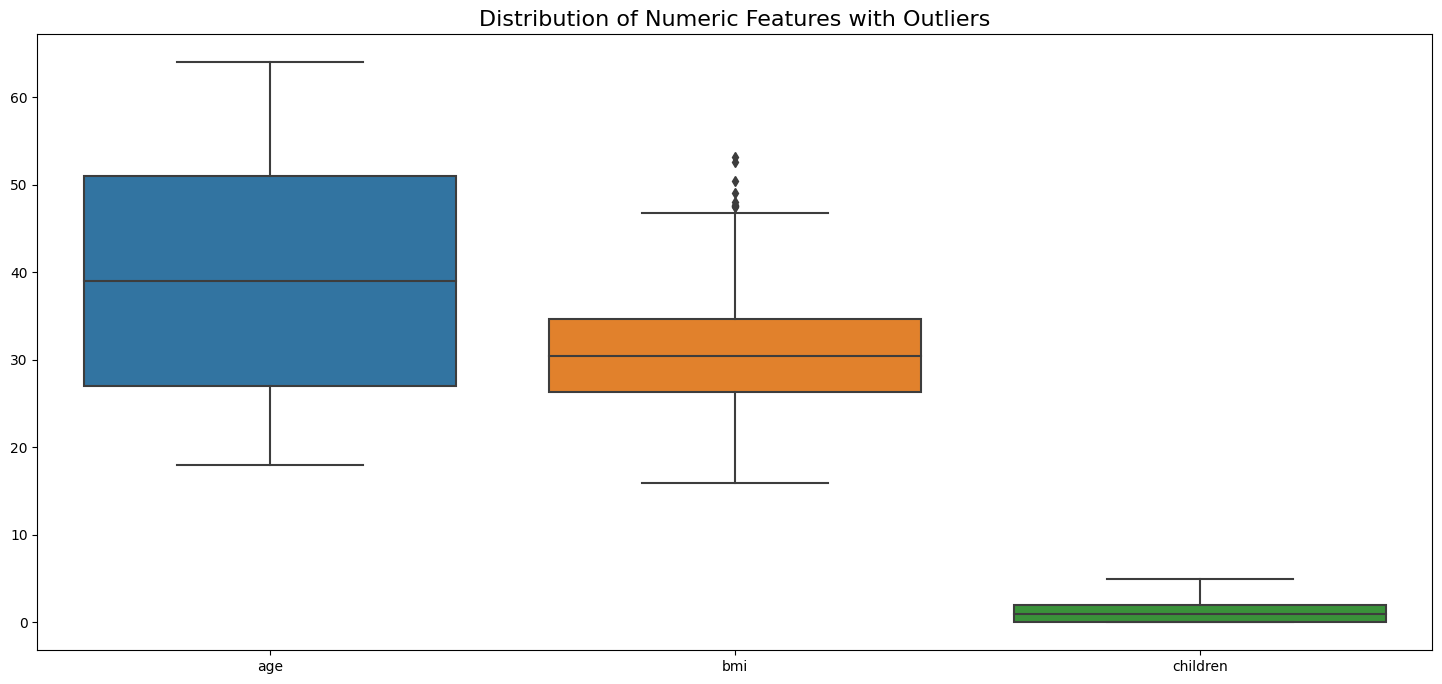

Original shape: (1337, 7), After outlier removal: (1328, 7)


In [4]:
# Box plot for numeric features to visualize outliers
plt.figure(figsize=(18, 8))
sns.boxplot(data=df[['age', 'bmi', 'children']])
plt.title('Distribution of Numeric Features with Outliers', fontsize=16)
plt.show()

# Handle BMI outliers using IQR method
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Filter out BMI outliers
df_clean = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]
print(f"Original shape: {df.shape}, After outlier removal: {df_clean.shape}")


# Feature Engineering


In [5]:
# Create a copy of the cleaned dataframe
df = df_clean.copy()

# Create log transformed charges
df['log_charges'] = np.log1p(df['charges'])


# Distribution Analysis of Numeric Features


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


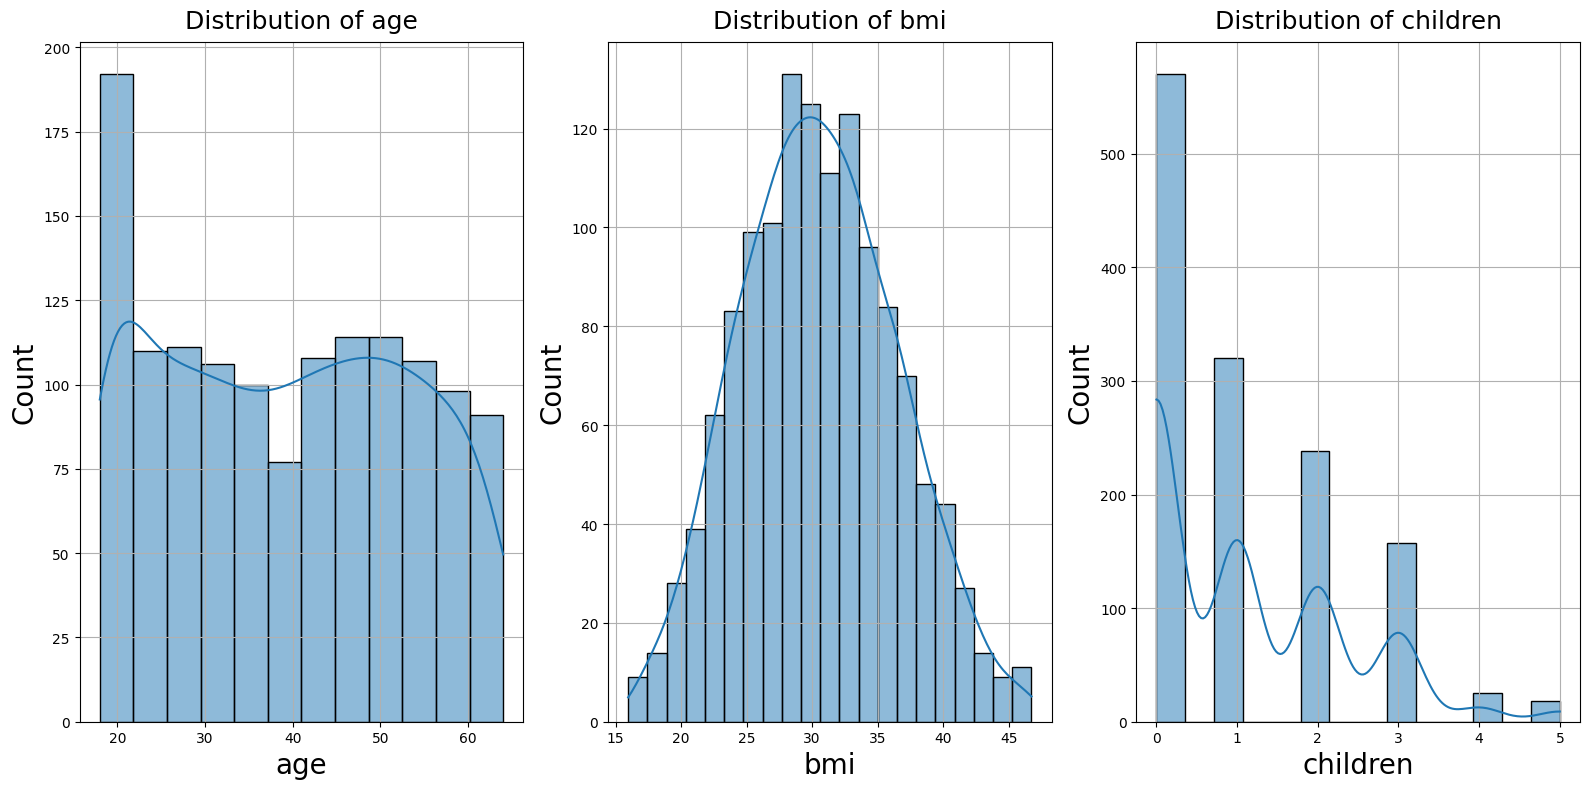

In [6]:
# Distribution of numeric features
num_features = df.select_dtypes(include='number')

fig, axs = plt.subplots(1, 3, figsize=(16, 8))

for i, col in enumerate(num_features.columns):
    if i < 3:  # Plot only numeric columns without charges and log_charges
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribution of {col}', fontsize=18, pad=10)
        axs[i].set_xlabel(col, fontsize=20)
        axs[i].set_ylabel('Count', fontsize=20)
        axs[i].grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


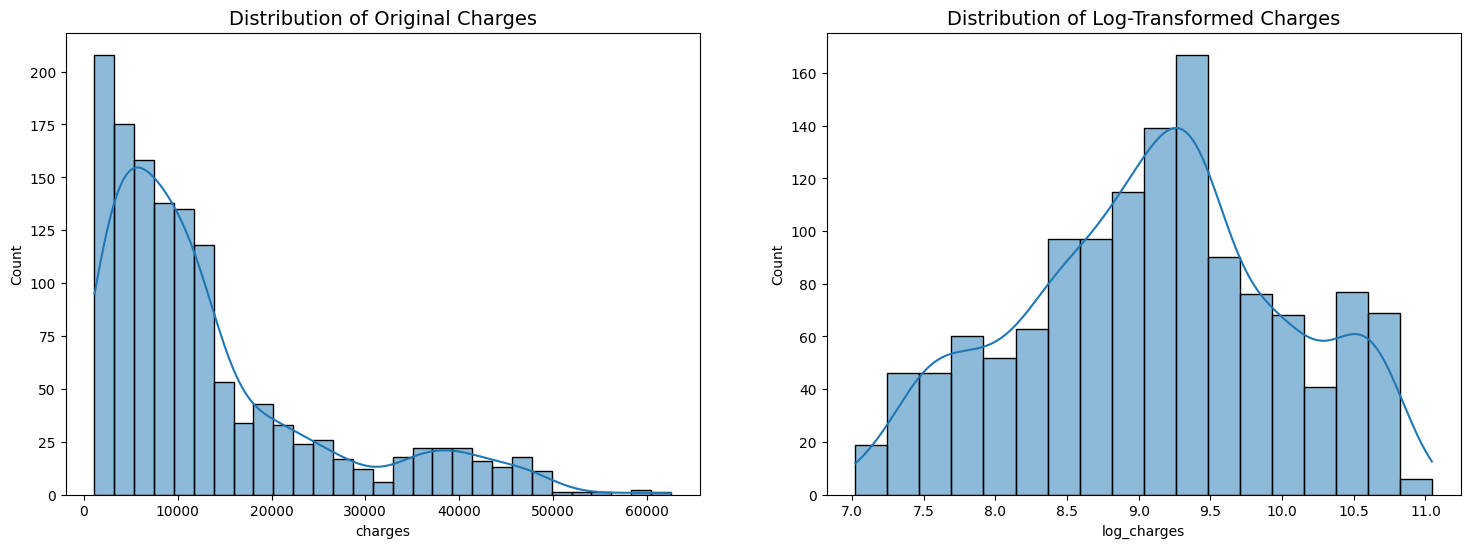

In [7]:
# Compare original charges vs log-transformed charges
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df['charges'], kde=True, ax=ax1)
ax1.set_title('Distribution of Original Charges', fontsize=14)

sns.histplot(df['log_charges'], kde=True, ax=ax2)
ax2.set_title('Distribution of Log-Transformed Charges', fontsize=14)

plt.show()

# Correlation Analysis


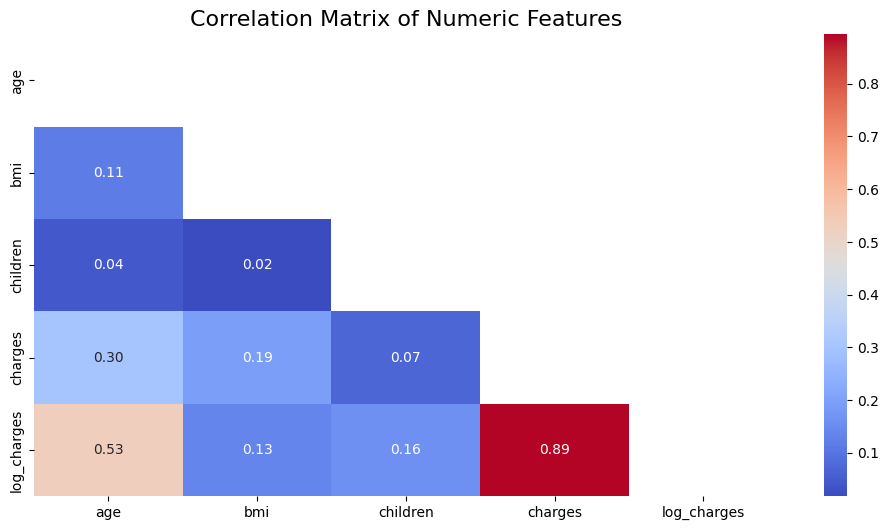

In [8]:
# Correlation heatmap for numeric features
correlation = num_features.corr()
mask = np.triu(correlation)

plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

# Categorical Feature Analysis


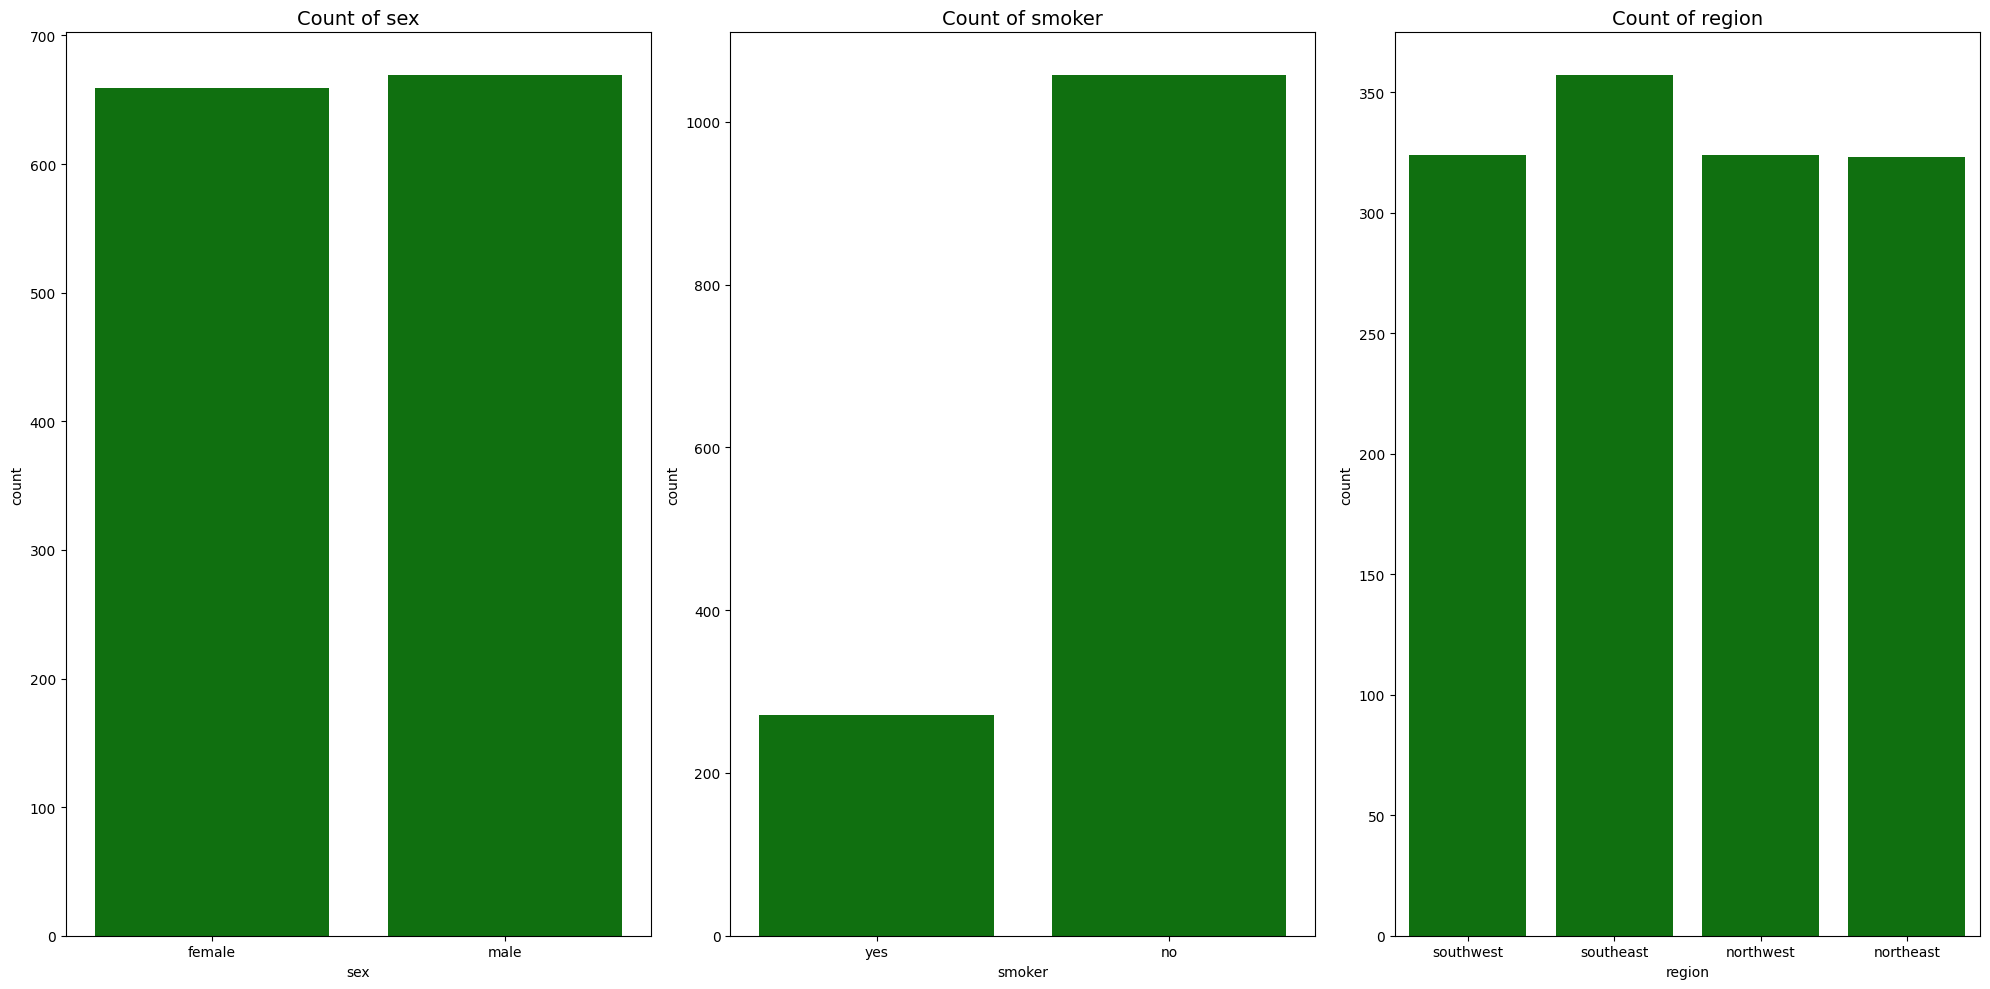

In [9]:
# Define categorical features
cat_features = df.select_dtypes(include='object').columns.tolist()

# Count plots for each categorical feature
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df, ax=axs[i], color='green')
    axs[i].set_title(f'Count of {col}', fontsize=14)

plt.tight_layout()
plt.show()

# Relationship Between Categorical Features and Charges


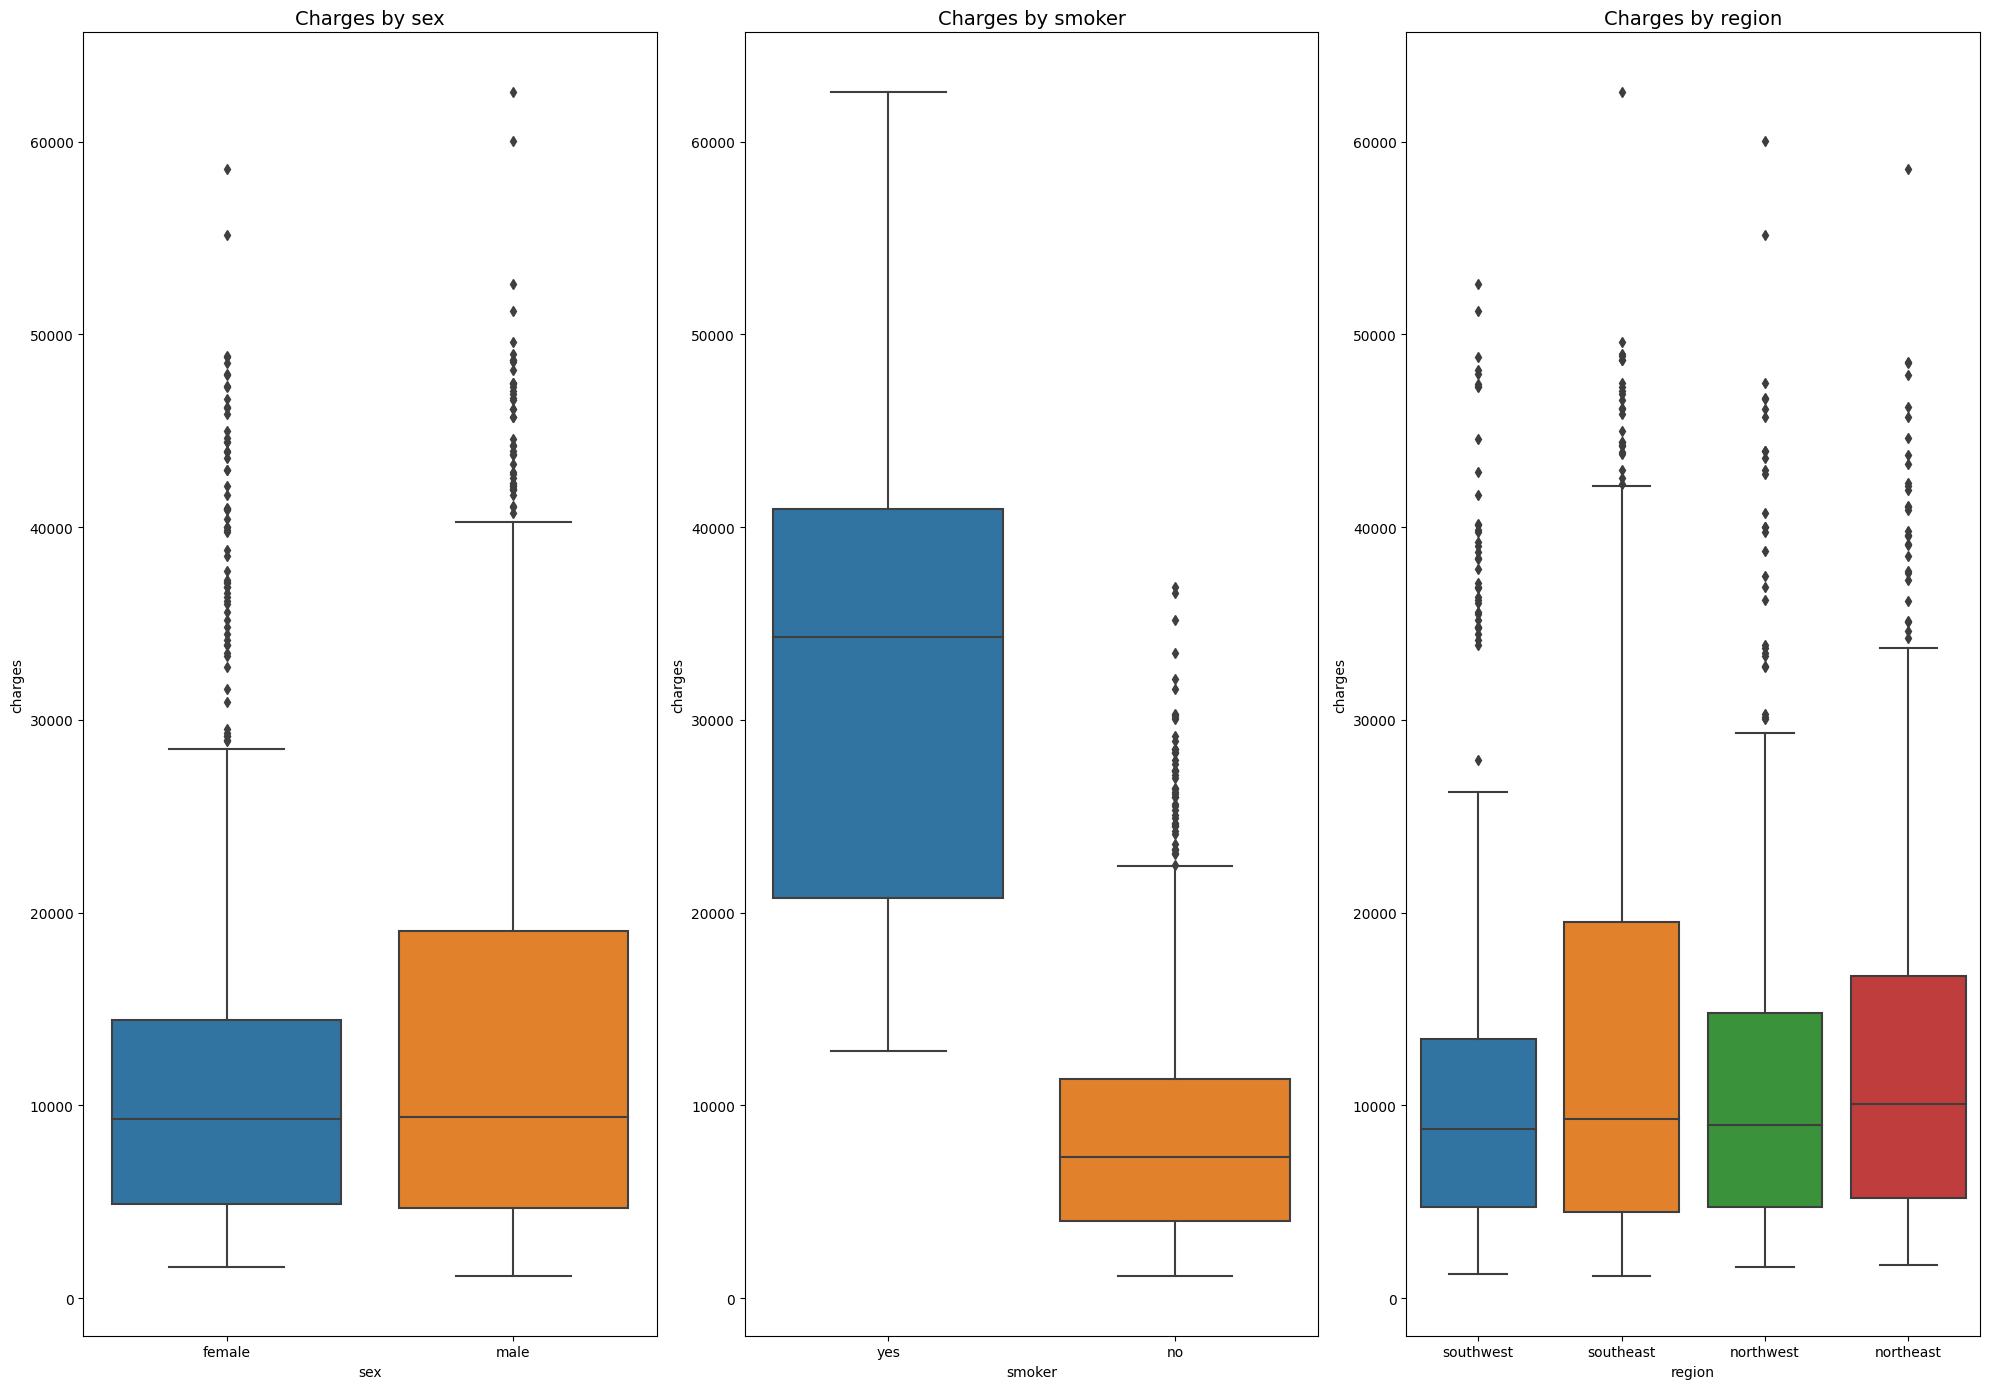

In [10]:
# Box plots of charges by each categorical variable
fig, axs = plt.subplots(1, 3, figsize=(20, 14))

for i, col in enumerate(cat_features):
    sns.boxplot(x=col, y='charges', data=df, ax=axs[i])
    axs[i].set_title(f'Charges by {col}', fontsize=14)

plt.tight_layout()
plt.show()

# Smoker Analysis


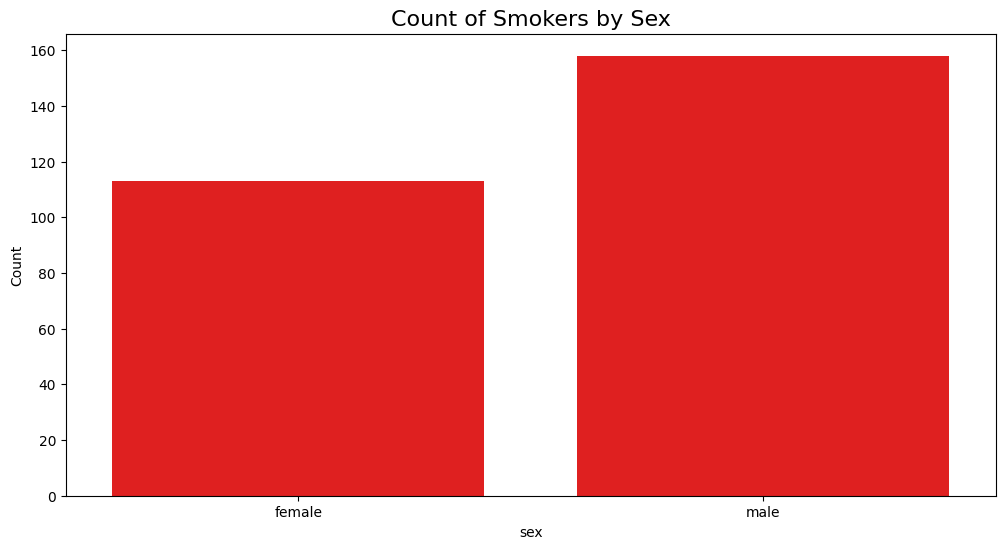

In [11]:
# Create a smoker dataframe
smokers = df[df['smoker'] == 'yes']

# Count of smokers by sex
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=smokers, color='red')
plt.title('Count of Smokers by Sex', fontsize=16)
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


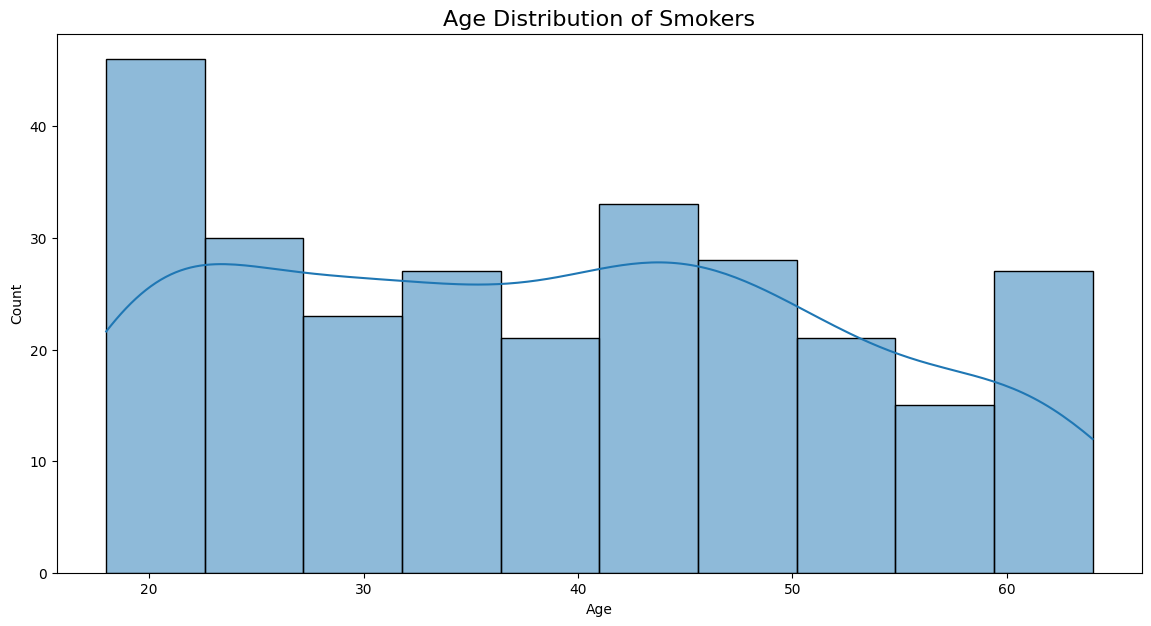

In [12]:
# Distribution of smokers by age
plt.figure(figsize=(14, 7))
sns.histplot(data=smokers, x='age', bins=10, kde=True)
plt.title('Age Distribution of Smokers', fontsize=16)
plt.xlabel('Age')
plt.show()

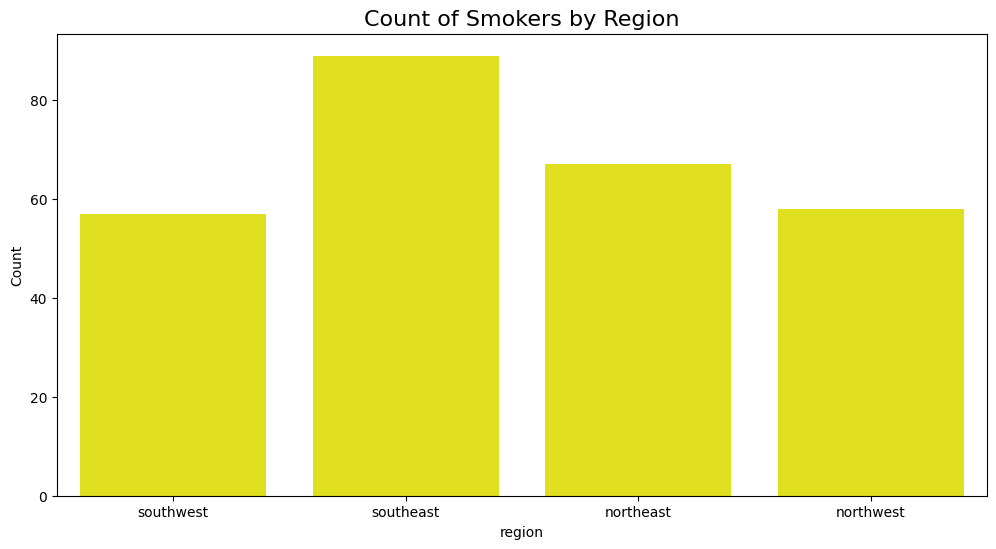

In [13]:
# Count of smokers by region
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=smokers, color='yellow')
plt.title('Count of Smokers by Region', fontsize=16)
plt.ylabel('Count')
plt.show()

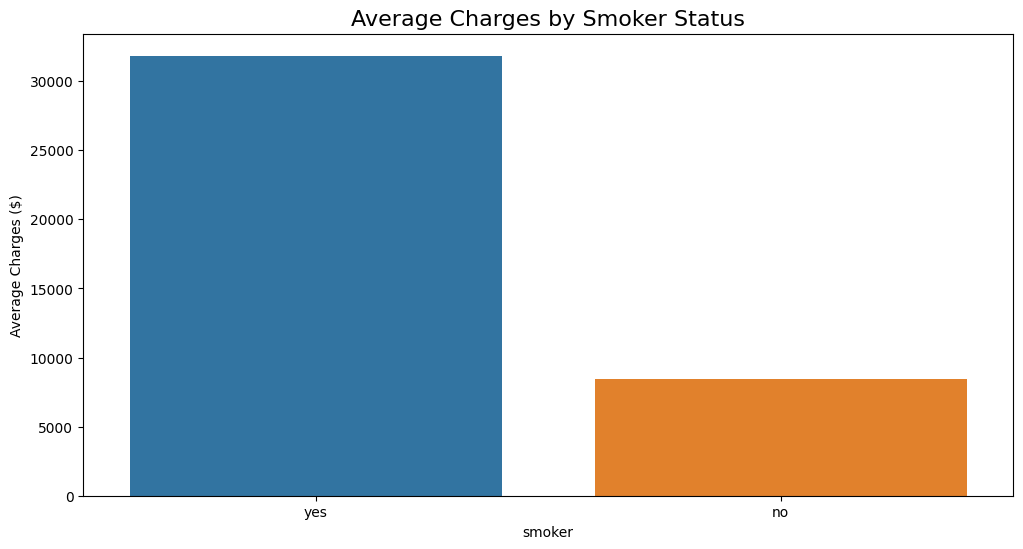

In [14]:
# Average charges by smoker status
plt.figure(figsize=(12, 6))
sns.barplot(x='smoker', y='charges', data=df, errorbar=None)
plt.title('Average Charges by Smoker Status', fontsize=16)
plt.ylabel('Average Charges ($)')
plt.show()

# Multivariate Analysis

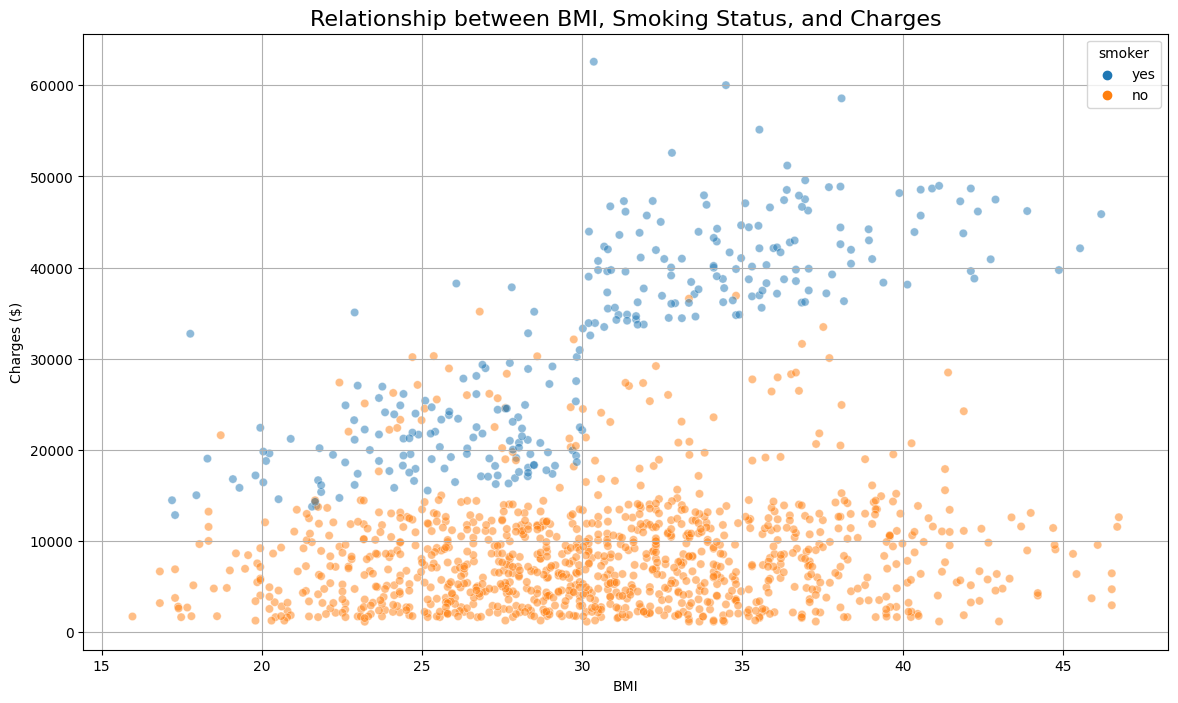

In [15]:
# Relationship between BMI, smoking status, and charges
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.5)
plt.title('Relationship between BMI, Smoking Status, and Charges', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.grid(True)
plt.show()

# Modeling

In [16]:
# Prepare data for modeling by converting categorical features to
ct = ColumnTransformer(
	transformers=[
		('onehot', OneHotEncoder(), cat_features)
    ], remainder='passthrough'
)

encoded = ct.fit_transform(df)
encoded_df = pd.DataFrame(encoded, columns=ct.get_feature_names_out())
df = encoded_df.copy()

# Define features and target
X = df.drop(['remainder__charges', 'remainder__log_charges'], axis=1)
y = df['remainder__log_charges']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

Training Set Results:
Mean Squared Error: 0.194
R² Score: 0.773

Test Set Results:
Mean Squared Error: 0.202
R² Score: 0.737


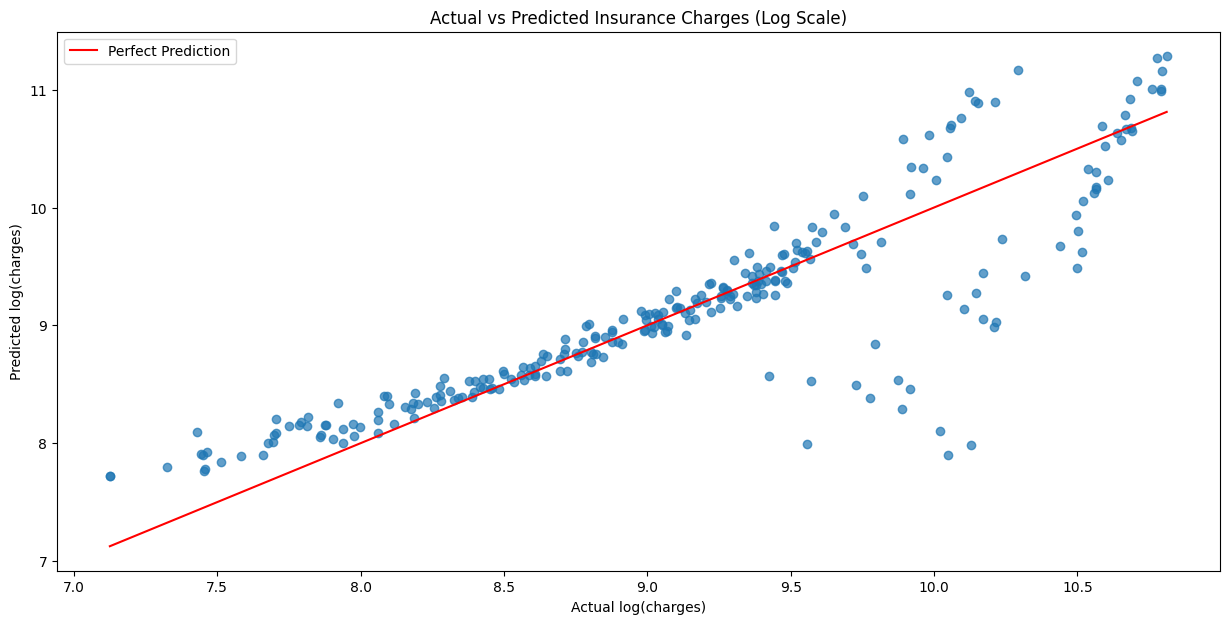

In [17]:
# Train linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluate model performance on training set
y_train_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate model performance on test set
y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print performance metrics
print("Training Set Results:")
print(f"Mean Squared Error: {mse_train:.3f}")
print(f"R² Score: {r2_train:.3f}\n")

print("Test Set Results:")
print(f"Mean Squared Error: {mse_test:.3f}")
print(f"R² Score: {r2_test:.3f}")

# Plot actual vs predicted values
plt.figure(figsize=(15, 7))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual log(charges)")
plt.ylabel("Predicted log(charges)")
plt.title("Actual vs Predicted Insurance Charges (Log Scale)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', label='Perfect Prediction')
plt.legend()
plt.show()

# Conclusions:
# 1. Smoking status has the strongest correlation with insurance charges
# 2. BMI also significantly influences charges, especially for smokers
# 3. Age shows a positive correlation with insurance costs
# 4. There are regional differences in insurance pricing